# Import Library

In [2]:
import shutil
import os
import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import accuracy

from surprise.model_selection import train_test_split

# Data Load

In [ ]:
# Unzip file
file_path = 'buku.zip'
shutil.unpack_archive(file_path, 'buku')

In [4]:
books_df = pd.read_csv('buku/Books.csv')
users_df = pd.read_csv('buku/Users.csv')
ratings_df = pd.read_csv('buku/Ratings.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_3424\2175165695.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('buku/Books.csv')


# Data Understanding

Books_df dataframe

In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books_df.shape

(271360, 8)

pada dataframe books_df terdiri dari 271360 baris dan 8 kolom didalamnya dengan kolomsebagai berikut:
1. ISBN = Nomor buku berstandar internasional
2. Book-Title = Judul buku
3. Book-Author = Penulis buku
4. Year-Of-Publication = Tahun terbit
5. Publisher = Penerbit
6. Image-URL-S = url gambar
7. Image-URL-M = url gambar
8. Image-URL-L = url gambar

In [7]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books_df['Publisher'].value_counts()

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: count, Length: 16807, dtype: int64

In [9]:
books_df['Book-Author'].value_counts()

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson             1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: count, Length: 102022, dtype: int64

In [10]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
books_df.duplicated().sum()

0

pada data books_df terdapat data yang hilang pada beberapa kolom seperti Book-Author, Publisher dan Image-URL-L, selain itu juga terdapat ketidaksesuaian tipe data pada kolom year-of-publication.

pada data yang hilang tersebut tidak aakn digunakan pada tahapan selanjutnya maka akan diabaikan.

## users_df dataframe

In [12]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [13]:
users_df.shape

(278858, 3)

dataframe users_df sendiri adalah dataframe yang berisi data user yang terdiri dari 278858 baris dan 3 kolom didalamnya dengan kolom sebagai berikut:
1. User-ID = ID user
2. Location = Lokasi
3. Age = Umur

In [14]:
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [15]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
users_df.duplicated().sum()

0

In [18]:
users_df['Age'].fillna(users_df['Age'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3424\2648942898.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['Age'].fillna(users_df['Age'].mean(), inplace=True)


In [19]:
bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60']
users_df['Age-Range'] = pd.cut(users_df['Age'], bins=bins, labels=labels, right=False)

In [20]:
age_counts = users_df['Age-Range'].value_counts().sort_index()

C:\Users\User\AppData\Local\Temp\ipykernel_3424\1372690376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette='rocket')


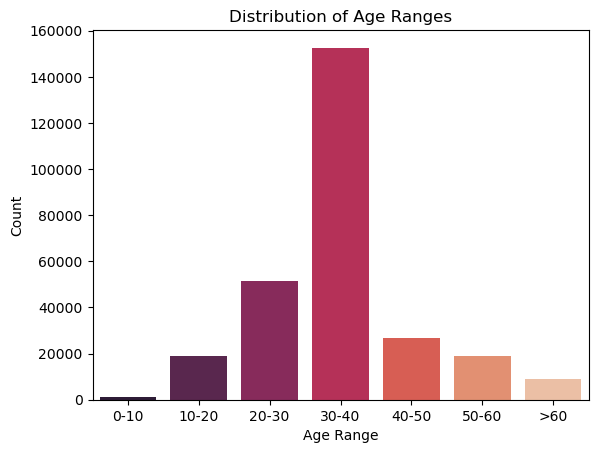

In [21]:
sns_barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette='rocket')
plt.title('Distribution of Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [22]:
users_df['Nationality'] = users_df['Location'].str.split(',').str[-1].str.strip()

In [23]:
users_df['Province'] = users_df['Location'].str.split(',').str[1].str.strip()

In [24]:
users_df['City'] = users_df['Location'].str.split(',').str[0].str.strip()

pada data users_df terdapat data yang hilang pada beberapa kolom Age, data yang hilang pun tidak sedikit yang mencapai hampir setengah dari keseluruhan data yang ada, akan tetapi berhubung tidak akan digunakan pada tahapan selanjutnya maka akan diabaikan.

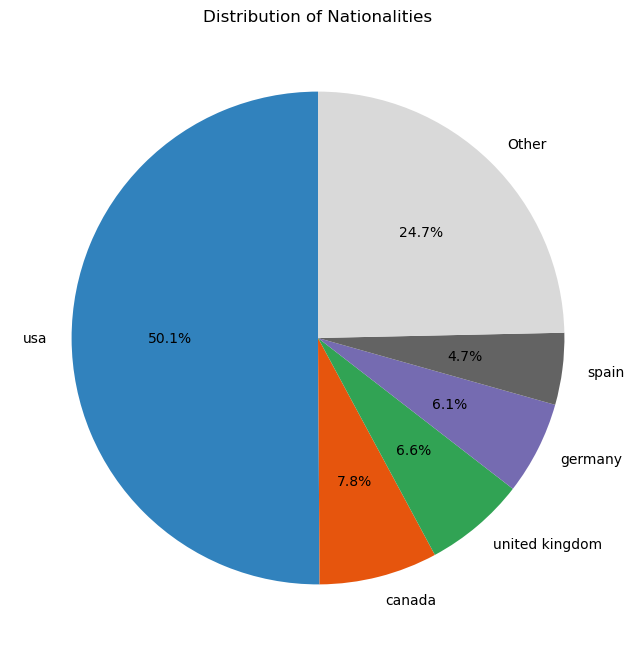

In [25]:
nationality_counts = users_df['Nationality'].value_counts()

top_n = 5
top_nationalities = nationality_counts[:top_n]
other_nationalities = nationality_counts[top_n:].sum()

if other_nationalities > 0:
    top_nationalities.loc['Other'] = other_nationalities

plt.figure(figsize=(8, 8))
plt.pie(top_nationalities.values, labels=top_nationalities.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c(np.linspace(0, 1, len(top_nationalities))))

plt.title('Distribution of Nationalities')
plt.show()

## ratings_df dataframe

In [26]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [27]:
ratings_df.shape

(1149780, 3)

dataframe ratings_df sendiri adalah dataframe yang berisi data rating dari setiap film dan useryang terdiri dari 1149780 baris dan 3 kolom didalamnya dengan kolom sebagai berikut:
1. User-ID = ID user
2. ISBN = Nomor buku berstandar internasional
3. Book-Rating = Rating

In [28]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [30]:
ratings_df['Book-Rating'].describe().round(2)

count    1149780.00
mean           2.87
std            3.85
min            0.00
25%            0.00
50%            0.00
75%            7.00
max           10.00
Name: Book-Rating, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_3424\2160477007.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_df['Book-Rating'].value_counts().index, y=ratings_df['Book-Rating'].value_counts().values, palette='rocket')


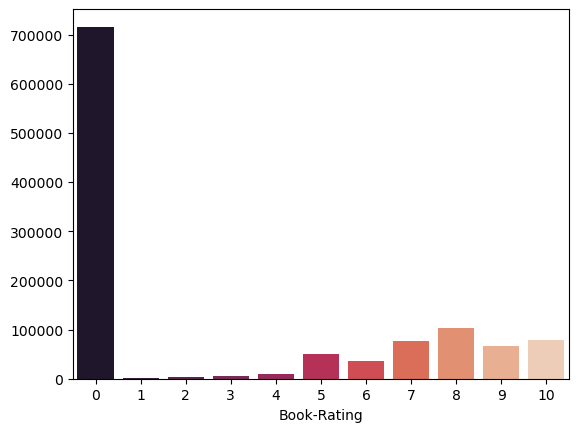

In [31]:
sns.barplot(x=ratings_df['Book-Rating'].value_counts().index, y=ratings_df['Book-Rating'].value_counts().values, palette='rocket')
plt.show()

In [32]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [33]:
ratings_df.duplicated().sum()

0

pada data ratings_df tidak ada data hilang, akan tetapi tipe data pada kolom user-id belum menjadi str yang nantinya akan bermasalah saat pemrosessan model, maka akan dilakukan perubahan tipe data pada kolom tersebut pada proses selanjutnya.

# Data Preparation
pada bagain ini akan dilakukan beberapa tahapan yang diperlukan untuk mempersiapkan beberapa buku yang akan direkomendasikan kepada user. Tahapan tersebut diantaranya:
1. Mengisi data Age yang hilang pada dataframe users_df
2. Menggabungkan data buku dan rating melalui kolom ISBN
3. Membuat tabel yang berisi jumlah yang membaca sebuah buku oleh user
4. Membuat tabel rata-rata rating pada setiap buku yang ada melalui rata-rata rating yang diberikan oleh user
5. Menggabungkan data jumlah rating (count_df) dan rata-rata rating (mean_df) menjadi satu tabel
6. Mengambil data buku dengan jumlah pembaca di atas 20 dan rata-rata rating di atas 4.5
7. Menerapkan filter pada merge_df dengan data preparation yang dihasilkan dari tahapan ke-4
8. Drop kolom yang tidak diperlukan
9. Membuat matrix dengan menggunakan pivot table
10. Mempersiapkan data untuk model SVD

In [ ]:
# mengisi data yang hilang
users_df['Age'].fillna(users_df['Age'].mean(), inplace=True)

In [34]:
# menggabungkan data buku dan rating
merge_df = pd.merge(ratings_df, books_df, on='ISBN')
merge_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [35]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 78.7+ MB


In [36]:
# membuat tabel rating pada setiap buku yang ada 
mean_df = merge_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)
mean_df = mean_df.reset_index(name = 'mean')
mean_df.head()

,Book-Title,mean
0,Film Is: The International Free Cinema,10.0
1,More Secrets of Happy Children: Embrace Your P...,10.0
2,Jo's Boys : From the Original Publisher,10.0
3,The Vanished Priestess : An Annie Szabo Mystery,10.0
4,Game and Hunting,10.0


In [37]:
# membuat tabel yang berisi jumlah yang membaca setiap buku
count_df = merge_df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)
count_df = count_df.reset_index(name='count')
count_df.head()


,Book-Title,count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


In [38]:
#menggabungkan data jumlah rating (count_df) dan rata-rata rating (mean_df) menjadi satu tabel
preparation = pd.merge(mean_df, count_df, on='Book-Title')
preparation.head()

,Book-Title,mean,count
0,Film Is: The International Free Cinema,10.0,1
1,More Secrets of Happy Children: Embrace Your P...,10.0,1
2,Jo's Boys : From the Original Publisher,10.0,1
3,The Vanished Priestess : An Annie Szabo Mystery,10.0,1
4,Game and Hunting,10.0,1


In [39]:
# mengambil data dengan ketentuan jumlah pembaca di atas 20 dan rata-rata rating di atas 4.5
preparation = preparation[preparation['count'] > 20]
preparation = preparation[preparation['mean'] > 4.5]
preparation

,Book-Title,mean,count
21509,Chobits (Chobits),8.035714,28
21510,Free,8.017857,56
33536,El Hobbit,7.692308,26
34922,Where the Sidewalk Ends : Poems and Drawings,7.121212,33
44310,Harry Potter y el cÃ¡liz de fuego,6.833333,24
...,...,...,...
70387,Dragonsong (Harper Hall Trilogy),4.516129,31
70388,The Funny Thing Is...,4.515152,33
70389,Drums of Autumn,4.514851,101
70390,Dry: A Memoir,4.512821,39


In [40]:
# menerapkan filter pada merge_df dengan data preparation dengan melakukkan filter pada kolom Book-Title
fix_df = merge_df[merge_df['Book-Title'].isin(preparation['Book-Title'])]

In [41]:
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21993 entries, 60 to 1031107
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              21993 non-null  int64 
 1   ISBN                 21993 non-null  object
 2   Book-Rating          21993 non-null  int64 
 3   Book-Title           21993 non-null  object
 4   Book-Author          21993 non-null  object
 5   Year-Of-Publication  21993 non-null  object
 6   Publisher            21993 non-null  object
 7   Image-URL-S          21993 non-null  object
 8   Image-URL-M          21993 non-null  object
 9   Image-URL-L          21993 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.8+ MB


In [42]:
# mengubah tipe data User-ID menjadi string
fix_df['User-ID'] = fix_df['User-ID'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_3424\122792612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df['User-ID'] = fix_df['User-ID'].astype(str)


In [43]:
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21993 entries, 60 to 1031107
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              21993 non-null  object
 1   ISBN                 21993 non-null  object
 2   Book-Rating          21993 non-null  int64 
 3   Book-Title           21993 non-null  object
 4   Book-Author          21993 non-null  object
 5   Year-Of-Publication  21993 non-null  object
 6   Publisher            21993 non-null  object
 7   Image-URL-S          21993 non-null  object
 8   Image-URL-M          21993 non-null  object
 9   Image-URL-L          21993 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [44]:
fix_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
60,276788,043935806X,7,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
81,276804,0439104769,0,Bloomability,Sharon Creech,0,Scholastic Inc,http://images.amazon.com/images/P/0439104769.0...,http://images.amazon.com/images/P/0439104769.0...,http://images.amazon.com/images/P/0439104769.0...
82,276804,0440498058,8,A Wrinkle In Time,MADELEINE L'ENGLE,1998,Yearling,http://images.amazon.com/images/P/0440498058.0...,http://images.amazon.com/images/P/0440498058.0...,http://images.amazon.com/images/P/0440498058.0...
121,276828,2253150711,7,Stupeur Et Tremblements,Amelie Nothomb,2001,Distribooks,http://images.amazon.com/images/P/2253150711.0...,http://images.amazon.com/images/P/2253150711.0...,http://images.amazon.com/images/P/2253150711.0...
168,276847,3551551677,10,Harry Potter und der Stein der Weisen,Joanne K. Rowling,1999,Carlsen Verlag GmbH,http://images.amazon.com/images/P/3551551677.0...,http://images.amazon.com/images/P/3551551677.0...,http://images.amazon.com/images/P/3551551677.0...


In [45]:
fix_df = fix_df.drop(columns=['ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
fix_df.head()

,User-ID,Book-Rating,Book-Title
60,276788,7,Harry Potter and the Order of the Phoenix (Boo...
81,276804,0,Bloomability
82,276804,8,A Wrinkle In Time
121,276828,7,Stupeur Et Tremblements
168,276847,10,Harry Potter und der Stein der Weisen


In [46]:
# melakukan filter pada fix_df untuk memilih hanya yang memiliki rating lebih besar dari 0
fix_df = fix_df[fix_df['Book-Rating'] > 0]

In [47]:
# membuat matrix dengan menggunakan pivot table
user_item_matrix = fix_df.pivot_table(
    index='User-ID', columns='Book-Title', values='Book-Rating'
)

In [48]:
user_item_matrix.fillna(0, inplace=True)

mempersiapkan data untuk model SVD

In [54]:
# membaca dataframe ke format surprise
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(merge_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

In [55]:
# split data menjadi train dan test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Model Development
1. Cosine Similarity
2. Model SVD

## Cosine Similarity

In [49]:
# melakukan perhitungan cosine similarity
book_similarity = cosine_similarity(user_item_matrix.T)

In [50]:
# membuat hasil perhitungan cosine similarity menjadi bentuk dataframe
book_similarity_df = pd.DataFrame(
    book_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns
)

In [51]:
book_similarity_df.head()

Book-Title,2001: A Space Odyssey,52 Deck Series: 52 Ways to Celebrate Friendship,A 5th Portion of Chicken Soup for the Soul : 101 Stories to Open the Heart and Rekindle the Spirit,A Caress of Twilight (Meredith Gentry Novels (Hardcover)),"A Clash of Kings (A Song of Fire and Ice, Book 2)",A Clockwork Orange (Norton Paperback Fiction),A Fire Upon The Deep (Zones of Thought),A Heart of Stone,A Light in the Attic,A Moveable Feast,...,Where the Wild Things Are,Wicca: A Guide for the Solitary Practitioner,Wielding a Red Sword (Incarnations of Immortality (Paperback)),Wiener Dog Art,Witch Child,"Wolves of the Calla (The Dark Tower, Book 5)",Writing Down the Bones,Xanth 15: The Color of Her Panties,Yukon Ho!,iI Paradiso Degli Orchi
Book-Title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
52 Deck Series: 52 Ways to Celebrate Friendship,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
A 5th Portion of Chicken Soup for the Soul : 101 Stories to Open the Heart and Rekindle the Spirit,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
A Caress of Twilight (Meredith Gentry Novels (Hardcover)),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.040362,0.03491,0.0,0.0,0.074902,0.0,0.087545,0.000000,0.0
"A Clash of Kings (A Song of Fire and Ice, Book 2)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.034889,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.041677,0.0


In [52]:
def get_similar_books(book_title, top_n=5):
    # Mengecek apakah book_title ada di DataFrame
    if book_title not in book_similarity_df.columns:
        print(f"Buku '{book_title}' tidak ditemukan di database.")
        return
    
    # Mengambil daftar rekomendasi berdasarkan cosine similarity
    recommendation = book_similarity_df[book_title].sort_values(ascending=False)

    # Memilih buku dengan kesamaan cosine similarity di atas 0.0
    filtered_recommendation = recommendation[recommendation > 0.0]

    # Mengatur ulang index
    filtered_recommendation = filtered_recommendation.reset_index()
    filtered_recommendation.columns = ['Book-Title', 'Similarity']

    # Mengurutkan ulang berdasarkan nilai similarity (meskipun sudah diurutkan)
    filtered_recommendation.sort_values('Similarity', ascending=False, inplace=True)

    # Menampilkan hasil rekomendasi (mengabaikan buku itu sendiri di indeks 0)
    print(f"Rekomendasi untuk buku '{book_title}':")
    for i, (book, similarity) in enumerate(filtered_recommendation.iloc[1:top_n+1].values, start=1):
        print(f"{i}. Book: {book} (Similarity: {round(similarity, 2)})")

In [53]:
get_similar_books('Harry Potter and the Order of the Phoenix (Book 5)')

Rekomendasi untuk buku 'Harry Potter and the Order of the Phoenix (Book 5)':
1. Book: Harry Potter and the Goblet of Fire (Book 4) (Similarity: 0.4)
2. Book: Harry Potter and the Prisoner of Azkaban (Book 3) (Similarity: 0.35)
3. Book: Harry Potter and the Chamber of Secrets (Book 2) (Similarity: 0.3)
4. Book: Harry Potter and the Sorcerer's Stone (Book 1) (Similarity: 0.26)
5. Book: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) (Similarity: 0.15)


## Model SVD

In [56]:
model = SVD()

In [57]:
model.fit(trainset)

In [58]:
def get_recommendations(user_id):
    # daftar judul buku
    all_books_title = fix_df['Book-Title'].unique()

    # buku yang telah dibaca oleh pengguna
    books_read = fix_df[fix_df['User-ID'] == user_id]['Book-Title'].unique()

    # buku yang belum dibaca oleh pengguna
    books_not_read = [book for book in all_books_title if book not in books_read]

    # prediksi rating untuk buku yang belum dibaca oleh pengguna
    recommendations = []
    for book_title in books_not_read:
        predictions = model.predict(user_id, book_title)
        recommendations.append((book_title, predictions.est))

    # mengurutkan rekomendasi berdasarkan prediksi rating
    recommendations.sort(key=lambda x: x[1], reverse=True)

    print (f"Rekomendasi buku untuk pengguna dengan ID {user_id}:")

    for book_title, rating in recommendations[:5]:
        print(f"Buku: {book_title} (Prediksi Rating: {rating.round(1)})")

In [59]:
get_recommendations('276729')

Rekomendasi buku untuk pengguna dengan ID 276729:
Buku: Free (Prediksi Rating: 7.7)
Buku: El Hobbit (Prediksi Rating: 6.0)
Buku: Love You Forever (Prediksi Rating: 6.0)
Buku: Falling Up (Prediksi Rating: 6.0)
Buku: Charlie and the Chocolate Factory (Prediksi Rating: 5.6)


# Model Evaluation

## Model Cosine Similarity

In [60]:
# Fungsi untuk memprediksi rating berdasarkan cosine similarity
def predict_rating(books_similarity, rating_matrix):
    predict_rating = np.dot(books_similarity, rating_matrix.T)/np.abs(books_similarity).sum(axis=1, keepdims=True)
    return predict_rating.T

In [61]:
predicted_rating = predict_rating(book_similarity, user_item_matrix)
predicted_rating_df = pd.DataFrame(predicted_rating, index=user_item_matrix.index, columns=user_item_matrix.columns)
predicted_rating_df.head()

Book-Title,2001: A Space Odyssey,52 Deck Series: 52 Ways to Celebrate Friendship,A 5th Portion of Chicken Soup for the Soul : 101 Stories to Open the Heart and Rekindle the Spirit,A Caress of Twilight (Meredith Gentry Novels (Hardcover)),"A Clash of Kings (A Song of Fire and Ice, Book 2)",A Clockwork Orange (Norton Paperback Fiction),A Fire Upon The Deep (Zones of Thought),A Heart of Stone,A Light in the Attic,A Moveable Feast,...,Where the Wild Things Are,Wicca: A Guide for the Solitary Practitioner,Wielding a Red Sword (Incarnations of Immortality (Paperback)),Wiener Dog Art,Witch Child,"Wolves of the Calla (The Dark Tower, Book 5)",Writing Down the Bones,Xanth 15: The Color of Her Panties,Yukon Ho!,iI Paradiso Degli Orchi
User-ID,,,,,,,,,,,,,,,,,,,,,
100004,0.074718,0.200998,0.292675,0.145917,0.174977,0.038089,0.215119,0.149640,0.082167,0.053661,...,0.133787,0.143966,0.219420,0.048656,0.074292,0.171069,0.056961,0.159356,0.054755,0.0
100009,0.000000,0.000000,0.000000,0.073387,0.000000,0.151174,0.182718,0.118067,0.006077,0.087767,...,0.084446,0.000000,0.067307,0.000000,0.039790,0.088883,0.000000,0.102316,0.011246,0.0
100053,0.068346,0.117103,0.127499,0.000000,0.027586,0.033455,0.060617,0.088044,0.045750,0.100864,...,0.082082,0.000000,0.024097,0.000000,0.000000,0.000000,0.018420,0.000000,0.022306,0.0
100075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026112,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022887,0.0
100088,0.000000,0.101134,0.000000,0.038754,0.000000,0.110355,0.013933,0.033729,0.046091,0.175847,...,0.000000,0.076809,0.000000,0.105911,0.238949,0.111104,0.057588,0.094668,0.052801,0.0


In [62]:
# mengambil data rating yang sebenarnya
actual_rating = user_item_matrix.values 

# menghitung RMSE pada data yang tidak nol
mask = actual_rating > 0
rmse = np.sqrt(np.mean((predicted_rating_df.values[mask] - actual_rating[mask])**2))
print (f"RMSE: {rmse:.4f}")

RMSE: 6.6217


## Model SVD

In [63]:
# Evaluasi model SVD berdasarkan RMSE
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 3.5161


dari hasil diatas dapat disimpulkan bahwa model SVD memiliki RMSE yang lebih kecil yang menunjukkan bahwa model SVD lebih akurat dalam memprediksi rating buku yang sesuai dengan rating yang sebenarnya dibandingkan dengan model cosine similarity.